# 1. Intro

* Regression problems are supervised learning problems in which the target variable is continuous
* Classification problems are supervised learning problems in which the target variable is categorical

<br>Benefits of linear regression:
* widely used
* runs fast
* easy to use (not a lot of tuning required)
* highly interpretable
* basis for many other methods

# 2. Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score  

# 3. Example: Advertising Data
Let's take a look at some data, ask some questions about that data, and then use linear regression to answer those questions.

In [2]:
# load the data
url = "https://raw.githubusercontent.com/babdelfa/ML/main/advertising_.csv"
df = pd.read_csv(url)
df

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


The advertising data set consists of the sales of a product in 200 different markets, along with advertising budgets for three different media: TV, radio, and newspaper. 
* The first row of the data says that the advertising budgets in dollars for TV, radio, and newspaper were 230.1k, 37.8k, and 69.2k respectively, and the corresponding number of units that were sold was 22.1k (or 22,100)

Possible Features: TV, Radio, and Newspaper (advertisement expense in units/1,000 dollars) <br>
Target: Sales (Number of units/1,000)

In [3]:
# View the information about the DataFrame
# use the pandas method .info()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


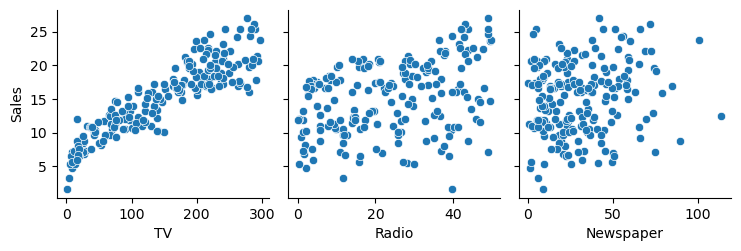

In [4]:
# Visualize the relationship between the features and the target using scatterplots
# Use seaborn's pairplot function 
# Assume the target is Sales (y_vars parameter) and 
#     the other variables are the features (x_vars parameter)

sns.pairplot(data=df,y_vars="Sales", x_vars=["TV", "Radio", "Newspaper"])

In [5]:
# View the correlation matrix using the pandas method .corr()

df.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.901208
Radio,0.054809,1.000000,0.354104,0.349631
Newspaper,0.056648,0.354104,1.000000,0.157960
Sales,0.901208,0.349631,0.157960,1.000000


# 4. Questions About the Advertising Data¶
Let's pretend you work for the company that manufactures and markets a product.<br>
The company might ask you the following: On the basis of this data, how should we spend our advertising money in the future? <br>

This general question might lead you to more specific questions:
* Is there a relationship between ads and sales?
* How strong is that relationship?
* Which ad types contribute to sales?
* What is the effect of each ad type of sales?
* Given ad spending in a particular market, can sales be predicted? 



# 5. Simple Linear Regression

* Simple linear regression is an approach for predicting a quantitative response using a single feature (or "predictor" or "input variable")
* It takes the following form: 




What does each term represent?

* y  is the target 
* x  is the feature
* β0  is the intercept
* β1  is the coefficient for x

* β0  and  β1  are called the model coefficients

To create your model, you must "learn" the values of these coefficients. Once we've learned these coefficients, we can use the model to predict Sales.

Let's say that there was a new market where the TV advertising spend was $50,000. What would we predict for the Sales in that market?

# 6. Estimating ("Learning") Model Coefficients

* Coefficients are estimated using the least squares criterion
    * In other words, we find the line (mathematically) which minimizes the sum of squared residuals (or "sum of squared errors"):

In [6]:
### SCIKIT-LEARN ###

# Determind feature(s) and target:
# X represents the feature TV (subset dataframe column to variable X; X shape must include 1 column) 
# Y represents the target Sales (subset dataframe column to variable y)

X = df[["TV"]]
y = df["Sales"]



In [7]:
X.shape
type(X)

pandas.core.frame.DataFrame

In [8]:
# Create a linear model:
# Instantiate using LinearRegression() <-- known as the estimator
# Fit the model with the data the .fit() method instantiated model
# 
model1 = LinearRegression()  
model1.fit(X.values, y.values)

LinearRegression()

In [9]:
# Display the coefficients of the linear model:
# Use coef_ attribute on the instantiated model to display  beta 1 
# Use intercept_ attribute on the instantiated model to display beta 0

print(model1.coef_)
print(model1.intercept_)

[0.05546477]
6.9748214882298925


# 7. Interpreting Model Coefficients

* A "unit" increase in TV ad spending is associated with a 0.05546477 "unit" increase in sales
* Or more clearly: An additional $1,000 spent on TV ads is associated with a 55.464 unit increase in sales.
* Note here that the coefficients represent associations, not causations


# 8. Using the Model for Prediction

Let's say that there was a new market where the TV advertising spend was $50,000. What would we predict for the Sales in that market?
<br>

$\hat{y} = \hat{\beta}_{0} + \hat{\beta}_{1}x $
<br>y = 6.9748214 + 0.0554677 * 50

<br> 
We would use 50 instead of 50,000 because the original data consists of examples that are divided by 1000

In [10]:
# Prediction model when $50,000 is spent for TV advertisement (estimator attributes approach)

(model1.intercept_ + ( model1.coef_ * 50))

array([9.74806001])

In [34]:
# Prediction model when $50,000 is spent for TV advertisement 
# Use the .predict() method
# Note: enter in double brackets to represent a value inside one row and one column

model1.predict([[50]])

array([9.74806001])

# 9. Plotting the Least Squares Line


In [12]:
# View the dataframe
df["Predict_Sales"] = model1.predict(df[['TV']].values)
df

,TV,Radio,Newspaper,Sales,Predict_Sales
0,230.1,37.8,69.2,22.1,19.737265
1,44.5,39.3,45.1,10.4,9.443004
2,17.2,45.9,69.3,12.0,7.928816
3,151.5,41.3,58.5,16.5,15.377734
4,180.8,10.8,58.4,17.9,17.002852
...,...,...,...,...,...
195,38.2,3.7,13.8,7.6,9.093576
196,94.2,4.9,8.1,14.0,12.199603
197,177.0,9.3,6.4,14.8,16.792086
198,283.6,42.0,66.2,25.5,22.704630


In [13]:
# Add Predicted Sales to the df dataframe 
model1.predict(df[['TV']].values)

array([19.73726517,  9.44300377,  7.92881554, 15.37773421, 17.00285199,
        7.45736499, 10.16404579, 13.6416869 ,  7.45181851, 18.05668263,
       10.64104282, 18.88310771,  8.29488303, 12.38263661, 18.29518114,
       17.81263764, 10.73533293, 22.5826079 , 10.8129836 , 15.14478218,
       19.08832736, 20.142158  ,  7.70695646, 19.63742859, 10.43027669,
       21.55650964, 14.90073719, 20.29191288, 20.77445638, 10.89063428,
       23.22045276, 13.23679407, 12.36599718, 21.70626452, 12.28280002,
       23.09843026, 21.77836873, 11.11803984,  9.3653531 , 19.62078916,
       18.20643751, 16.79208586, 23.2592781 , 18.4504825 ,  8.36698723,
       16.6867028 , 11.9500114 , 20.28081992, 19.57641734, 10.68541463,
       18.05668263, 12.54348444, 18.97739782, 17.10268858, 21.54541669,
       18.00676433,  7.37971431, 14.52912323, 18.6667951 , 18.66124863,
        9.94218671, 21.46776601, 20.24754106, 12.67105342, 14.2462529 ,
       10.80189065,  8.72196176, 14.70106401, 20.142158  , 18.99

In [14]:
# View df dataframe
df

,TV,Radio,Newspaper,Sales,Predict_Sales
0,230.1,37.8,69.2,22.1,19.737265
1,44.5,39.3,45.1,10.4,9.443004
2,17.2,45.9,69.3,12.0,7.928816
3,151.5,41.3,58.5,16.5,15.377734
4,180.8,10.8,58.4,17.9,17.002852
...,...,...,...,...,...
195,38.2,3.7,13.8,7.6,9.093576
196,94.2,4.9,8.1,14.0,12.199603
197,177.0,9.3,6.4,14.8,16.792086
198,283.6,42.0,66.2,25.5,22.704630


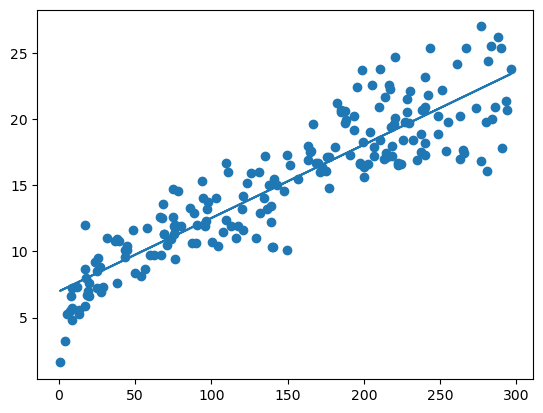

In [15]:
# Plot the least squares line 
plt.scatter(X, y)
plt.plot(X, model1.predict(X.values))
plt.show()

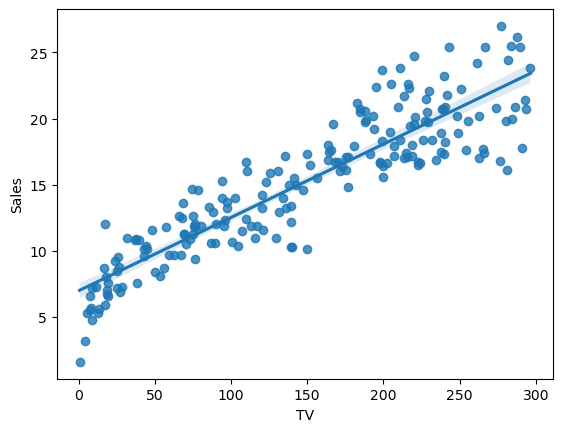

In [16]:
sns.regplot(x="TV", y="Sales", data=df)
plt.show()

# 10. How Well Does the Model Fit the data?

To evaluate the overall fit of a linear model, we use the R-squared value

* R-squared is the proportion of variance explained
    * It is the proportion of variance in the observed data that is explained by the model
* R-squared is between 0 and 1
    * Higher values are better because it means that more variance is explained by the model.

In [17]:
# View r-square (score method)
model1.score(X.values, y.values)

0.8121757029987414

### The steps above did not split the data into train and test sets. The next portion will examine this. 

# Train-Test-Split Approach 

Documentation:
* https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html
* https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

In [18]:
# split the data

train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=433)

In [19]:
# check the shape of X_train variable

print(X.shape)
print(X_train.shape)
print(X_test.shape)

(200, 1)
(150, 1)
(50, 1)


In [20]:
# instantiate the model
# fit the model using the training data
# review the r-squared score using training data

model2 = LinearRegression()
model2.fit(X_train.values, y_train.values)
model2.score(X_train.values, y_train.values)



0.8184104722180896

In [21]:
# review the r-squared score (accuracy score) using test data

model2.score(X_test.values, y_test.values)

0.7922063617487785

In [22]:
# y-intercept

model2.intercept_


7.193859988200693

In [23]:
# slope; feature's beta coef. 

model2.coef_


array([0.05403207])

In [24]:
# Visualize the prediction model line with the training data and testing data








### Multi-variate Regression

In [25]:
# Run a multi-variate regression model using the two best features to predict the target (Sales).
# Use the train_test_split approach with 30% belonging to the test set; set random_state to 100.
# How many observations are in the train set? Provide the code.
# What is the accuracy score of the model? 
# Predict Sales by entering average value for each feature in your model.

In [26]:
# Run a multi-variate regression model using the two best features to predict the target (Sales).

df.corr()
X = df[["TV", "Radio"]]
y = df[["Sales"]]

model3 = LinearRegression()
model3.fit(X.values, y.values)
model3.score(X.values, y.values)

0.9025896186081139

In [27]:
# Use the train_test_split approach with 30% belonging to the test set; set random_state to 100.

X = df[["TV", "Radio"]]
y = df[["Sales"]]

model4 = LinearRegression()
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=100, test_size=.30)


model4.fit(X_train.values, y_train.values)
model4.score(X_test.values, y_test.values)


0.8702269065022538

In [28]:
# How many observations are in the train set? Provide the code.

X_train.shape

(140, 2)

In [29]:
# Predict Sales by entering average value for each feature in your model.

print(df.TV.mean())
print(df.Radio.mean())

model4.predict([[147.04, 23.26]])

147.0425
23.264000000000024


array([[15.00741483]])

# k-Folds Cross-validation Approach

In this approach called k-fold CV, the training set is split into k smaller sets. This approach is recommended with for small datasets and simple models such as linear regression. Repeated k-fold cross-validation provides a way to reduce the error in the estimate of mean model performance. The following procedure is followed for each of the k “folds”:
    
* A model is trained using k-1 of the folds as training data;
* the resulting model is validated on the remaining part of the data (i.e., it is used as a test set to compute a performance measure such as accuracy).
* The performance measure reported by k-fold cross-validation is then the average of the values computed in the loop.



https://scikit-learn.org/stable/modules/cross_validation.html

https://www.ritchieng.com/machine-learning-cross-validation/

https://machinelearningmastery.com/k-fold-cross-validation/

In [30]:
X.shape

(200, 2)

In [31]:
cv_model = LinearRegression()
cv_result = cross_val_score(cv_model, X, y, cv=5)
print(cv_result)
print(cv_result.mean())

[0.87617457 0.93226787 0.92150565 0.84560973 0.90370969]
0.8958535029714982


In [32]:
# On average, the model is ---% accurate  

Note - The notebook was partially reproduced from: https://www.ritchieng.com/machine-learning-evaluate-linear-regression-model/